<a href="https://colab.research.google.com/github/raquel-maia/python-dados/blob/main/An%C3%A1lise_demanda_de_estoque_DATA_ANALYTCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import seaborn as sns #visualização de dados
import matplotlib.pyplot as plt #visualização de dados


In [ ]:
import numpy as np #manipulação de dados

In [ ]:
from scipy.stats import norm #biblioteca para estatística

In [ ]:
estoque_df = pd.read_csv("estoque.csv", sep = ";")

In [ ]:
estoque_df.head()

,id_loja,estoque,data
0,1,167,2023-02-01
1,1,160,2023-03-01
2,1,184,2023-04-01
3,1,164,2023-05-01
4,1,188,2023-06-01


##verificar os tipos de dados


In [ ]:
num_linhas, num_colunas = estoque_df.shape
tipos_de_variaveis = estoque_df.dtypes

print("Numero de linhas:", num_linhas)
print("Numero de Colunas:", num_colunas)
display("Tipos de variáveis:", tipos_de_variaveis)

Numero de linhas: 174
Numero de Colunas: 3


'Tipos de variáveis:'

id_loja     int64
estoque     int64
data       object
dtype: object

##Alterar object e tranformar em data ( se olharmos a data e tiver como object precisamos alterar para datetime)



In [ ]:
estoque_df['data'] = pd.to_datetime(estoque_df["data"])

##verificando novamente os tipo de dados encontrados


In [ ]:
estoque_df.dtypes

id_loja     int64
estoque     int64
data       object
dtype: object

##verificando o describe para obter as frequencias e medidas das variáveis numéricas

In [ ]:
estoque_df.describe()

,id_loja,estoque
count,174.000000,174.000000
mean,2.000000,251.758621
std,0.818853,171.722653
min,1.000000,75.000000
25%,1.000000,92.000000
50%,2.000000,181.500000
75%,3.000000,484.000000
max,3.000000,500.000000


## Pelo describe acima vemos que temos na base o estoque e a data de medição de 3 lojas da empresa de calçados vamos agora analisar alguns dados por loja

estoque_df: Este é um DataFrame do pandas que contém dados sobre o estoque em várias lojas.

groupby(["id_loja"]): Este método agrupa os dados do DataFrame pelo valor da coluna "id_loja". Isso significa que todas as linhas com o mesmo valor na coluna "id_loja" serão agrupadas juntas.

agg({"estoque": [np.mean, np.min, np.max, np.std], "data": [np.min, np.max]}): Este método agg() é usado para aplicar várias funções de agregação aos grupos de dados. Aqui, estamos especificando que queremos calcular várias estatísticas para duas colunas diferentes:

Para a coluna "estoque", queremos calcular a média (np.mean), o valor mínimo (np.min), o valor máximo (np.max) e o desvio padrão (np.std).
Para a coluna "data", queremos calcular a data mínima (np.min) e a data máxima (np.max).
O resultado será um novo DataFrame onde cada linha corresponde a um grupo de dados (nesse caso, uma loja), e as colunas serão as estatísticas calculadas para o estoque e as datas dessa loja específica.

np.mean, np.min, np.max, np.std, np.min, np.max: Essas são funções do NumPy que são usadas para calcular a média, mínimo, máximo e desvio padrão de uma série de valores, bem como para encontrar as datas mínima e máxima em uma série de datas.

Basicamente, o código agrupa os dados por loja e calcula estatísticas sobre o estoque e datas para cada uma dessas lojas. Isso pode ser útil para análise e tomada de decisões com base nos dados de estoque em diferentes locais ao longo do tempo.

In [ ]:
estoque_df.groupby(["id_loja"]).agg({"estoque": [np.mean, np.min, np.max, np.std], "data": [np.min, np.max]})

estoque                          data          
               mean  min  max       std       min       max
id_loja                                                    
1        179.965517  155  196  9.689867  01/02/23  31/01/23
2         87.568966   75  101  6.229843  01/02/23  31/01/23
3        487.741379  474  500  5.223296  01/02/23  31/01/23

Pela Tabela acima, vemos que:

>A Loja 3 tem uma média maior de estoque do que as outras lojas e o desvio padrão menor de , proximo a 5
> a Loja 2 possui o menor estoque e desvio padrão proximo a 6
> A loja 1 possui uma média aproximada de 180 calçados e o maior desvio padrão, apx 9,7




##Análise de distribuição do estoque de loja

In [ ]:
numero_lojas = estoque_df.id_loja.nunique()# numero de lojas
print(f'Temos um total de:', numero_lojas, 'lojas')

Temos um total de: 3 lojas


##Histogramas das Lojas

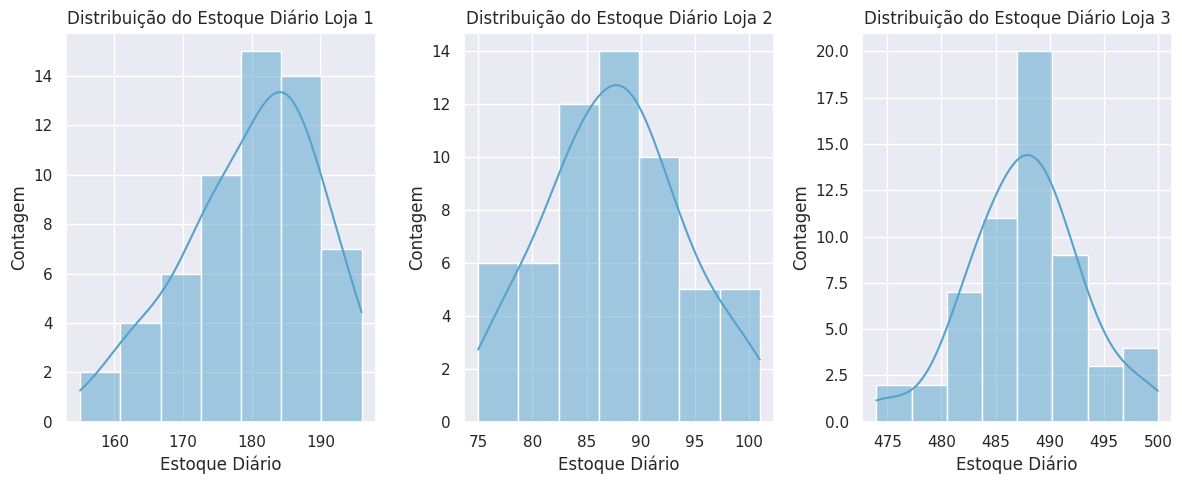

In [ ]:
sns.set_palette("icefire") ## Setando a paleta de cores

numero_lojas = estoque_df.id_loja.nunique() ## Conta o número de lojas únicas
fig, ax = plt.subplots(nrows=1, ncols=numero_lojas, figsize=(12,5)) ## Cria uma figura e eixos para cada loja
i = 0 ## Inicializa o contador de eixos

for loja in estoque_df.id_loja.unique(): ## Loop sobre cada loja única no DataFrame
    ## Histograma
    sns.set(style="darkgrid") ## Define o estilo do gráfico
    sns.histplot(estoque_df[estoque_df.id_loja == loja]["estoque"], ax=ax[i], kde=True, edgecolor=None) ## Plota o histograma dos estoques para a loja atual
    ax[i].set_title('Distribuição do Estoque Diário Loja {}'.format(loja)) ## Define o título do gráfico
    ax[i].set_xlabel('Estoque Diário') ## Define o rótulo do eixo x
    ax[i].set_ylabel('Contagem') ## Define o rótulo do eixo y
    ## Adiciona 1 ao contador
    i = i + 1

plt.tight_layout() ## Ajusta o layout dos subplots para evitar sobreposição
plt.show() ## Mostra o gráfico


Podemos ver que todos os estoques das lojas apresentam uma distribuição em formato de sino, que se assemelha muito visualmente a distribuição normal. A loja 1 apresenta uma assemetria na distribuição para a  esquerda.

##Alternativa pra analisar em um único gráfico

<function matplotlib.pyplot.show(close=None, block=None)>

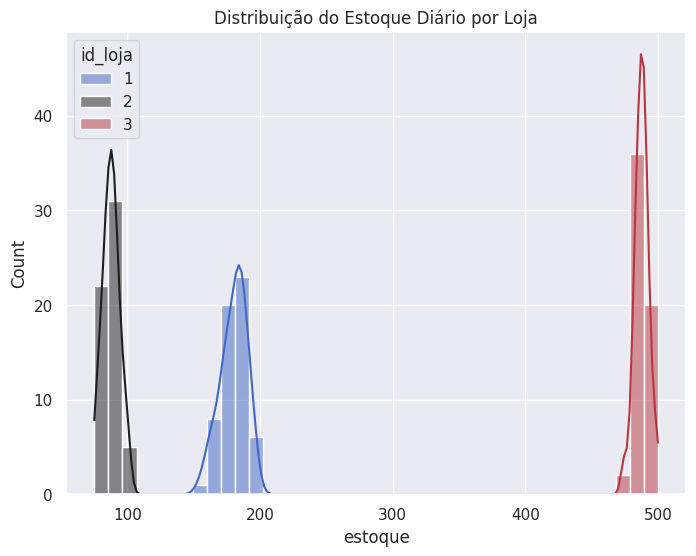

In [ ]:
sns.set(style="darkgrid") ## Define o estilo do gráfico
plt.figure(figsize=(8, 6))
sns.histplot(data=estoque_df, x="estoque",hue="id_loja", bins = 40, kde=True, palette=sns.color_palette("icefire", n_colors=3)) ## Plota o histograma dos estoques para a loja atual
plt.title(label='Distribuição do Estoque Diário por Loja') ## Define o título do gráfico
plt.show

##Plotando um boxplot

<ipython-input-40-97e7c25a0f90>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=estoque_df, y="estoque", x="id_loja", palette=sns.color_palette("icefire", n_colors=3)) ## Plota o histograma dos estoques para a loja atual


<function matplotlib.pyplot.show(close=None, block=None)>

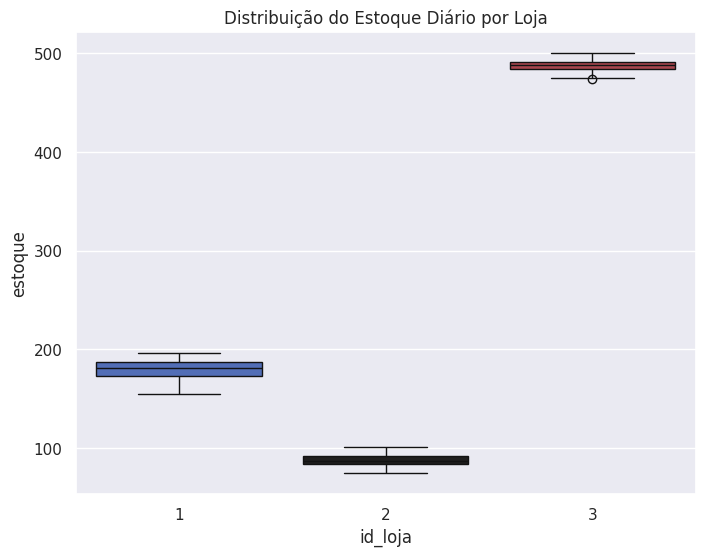

In [ ]:
sns.set(style="darkgrid") ## Define o estilo do gráfico
plt.figure(figsize=(8, 6))
sns.boxplot(data=estoque_df, y="estoque", x="id_loja", palette=sns.color_palette("icefire", n_colors=3)) ## Plota o histograma dos estoques para a loja atual
plt.title(label='Distribuição do Estoque Diário por Loja') ## Define o título do gráfico
plt.show

Podemos perceber que o estoque d aloja 3 é bem maior do que o das outras lojas e não existe overlap de estoques entre tais lojas. O que pode ser um indicativo de que:

1 . As lojas apresentam comportamento de consumo bem diferente, podendo estar localizadas em regiões ou pontos de vendas diferentes
2. A loja 3 supostamente deve ser a que mais vende, necessitando de um maior estoque

##Calcular qual seria a amostra necessária para estimar a média do estoque de cada uma das lojas

Para calcular a amostra necessária para compararmos a média do estoque de duas lojas vamos precisar da formula da margem de erro para mpedias em que o desvio padrão é desconhecido , vamos verificar antes o tamanho da amostra que temos para decidir qual formula utilizar


In [ ]:
estoque_df[["id_loja", "estoque"]].groupby("id_loja").count()

,estoque
id_loja,
1,58
2,58
3,58


Como temos 58 informações de estoque de cada uma das lojas podemos utilizar a aaproximação de sigma = amplitude/4 ou sigma ou assumir que sigma é igual ao desvio padrão amostral

E seus respectivos inputs


*   sigma: estimado a partir da amplitude, portante necessitaremos os valores max, min do estoque de cada loja para dividir essa diferença por 4
*   n é o que queremos descobrir
* z(a/2) é o valor da estátisca z para o nível de significancia que a distribuição é bicaldal.

Vamos primeiramente obter os inputs da fórmula para depois substituirmos os valores




1. Primeira Loja

In [ ]:
### INPUTS LOJA 1

### SIGMA ESTIMADO COM A AMPLITUDE
sigma_linha = (estoque_df[estoque_df.id_loja ==1]["estoque"].max() - estoque_df[estoque_df.id_loja ==1]["estoque"].min())/4

### VALOR DE Z(A/2) PARA A = 5%

a = 0.05
z = norm.ppf(1-a/2)

### n = ((z*sigma_linha)/me) **2

### margem, me = 2%

me = 0.02
n = round(((z*sigma_linha)/me)**2,0)
print("O tamanho da amostra sera de "+str(n)+" para amrgem de erro de 2% e 5% de siginificancia")
me = 0.1 ##magem de erro de 10%
n = round(((z*sigma_linha)/me)**2,0)
print("O tamanho da amostra sera de "+str(n)+" para amrgem de erro de 10% e 5% de siginificancia")

O tamanho da amostra sera de 1008983.0 para amrgem de erro de 2% e 5% de siginificancia
O tamanho da amostra sera de 40359.0 para amrgem de erro de 10% e 5% de siginificancia


## Todas as Lojas

In [ ]:
a = 0.05
z = norm.ppf(1-a/2)

for loja in estoque_df.id_loja.unique():
    sigma_linha = (estoque_df[estoque_df.id_loja == loja]["estoque"].max() - estoque_df[estoque_df.id_loja == loja]["estoque"].min()) / 4

    # Tamanho da amostra para margem de erro de 2% e 5% de significância
    me = 0.02
    n = round(((z * sigma_linha) / me) ** 2, 0)
    print("O tamanho da amostra será de " + str(n) + " para margem de erro de 2% e 5% de significância para a loja " + str(loja))

    # Tamanho da amostra para margem de erro de 10% e 5% de significância
    me = 0.1
    n = round(((z * sigma_linha) / me) ** 2, 0)
    print("O tamanho da amostra será de " + str(n) + " para margem de erro de 10% e 5% de significância para a loja " + str(loja))



O tamanho da amostra será de 1008983.0 para margem de erro de 2% e 5% de significância para a loja 1
O tamanho da amostra será de 40359.0 para margem de erro de 10% e 5% de significância para a loja 1
O tamanho da amostra será de 405754.0 para margem de erro de 2% e 5% de significância para a loja 2
O tamanho da amostra será de 16230.0 para margem de erro de 10% e 5% de significância para a loja 2
O tamanho da amostra será de 405754.0 para margem de erro de 2% e 5% de significância para a loja 3
O tamanho da amostra será de 16230.0 para margem de erro de 10% e 5% de significância para a loja 3


## Utilizando estimação de sigma com a segunda opção (assumindo que o desvio padrão amostral = populacional)



In [ ]:
a = 0.05
z = norm.ppf(1-a/2)

for loja in estoque_df.id_loja.unique():
    sigma_linha = estoque_df[estoque_df.id_loja == loja]["estoque"].std()

    # Tamanho da amostra para margem de erro de 2% e 5% de significância
    me = 0.02
    n = round(((z * sigma_linha) / me) ** 2, 0)
    print("O tamanho da amostra será de " + str(n) + " para margem de erro de 2% e 5% de significância para a loja " + str(loja))

    # Tamanho da amostra para margem de erro de 10% e 5% de significância
    me = 0.1
    n = round(((z * sigma_linha) / me) ** 2, 0)
    print("O tamanho da amostra será de " + str(n) + " para margem de erro de 10% e 5% de significância para a loja " + str(loja))


O tamanho da amostra será de 901720.0 para margem de erro de 2% e 5% de significância para a loja 1
O tamanho da amostra será de 36069.0 para margem de erro de 10% e 5% de significância para a loja 1
O tamanho da amostra será de 372727.0 para margem de erro de 2% e 5% de significância para a loja 2
O tamanho da amostra será de 14909.0 para margem de erro de 10% e 5% de significância para a loja 2
O tamanho da amostra será de 262015.0 para margem de erro de 2% e 5% de significância para a loja 3
O tamanho da amostra será de 10481.0 para margem de erro de 10% e 5% de significância para a loja 3


exemplo pratico como calcula o tamanho da busca